<a href="https://colab.research.google.com/github/Satyake/Open-AI-LLM-Langchain-Projects/blob/main/Multi_Modal_Rag_System_(Video_data)_LLM_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. llamaindex
2. Lancedb (vectordb for text and images)
3. LLM model (GPT-4v)[ image based ]

In [1]:
#!pip -q install llama-index-vector-stores-lancedb
#!pip  -q install llama-index-multi-modal-llms-openai
!pip -q install llama-index-embeddings-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requ

In [2]:
%pip -q install llama_index ftfy regex tqdm
%pip -q install -U openai-whisper
%pip -q install git+https://github.com/openai/CLIP.git
%pip -q install torch torchvision
%pip -q install matplotlib scikit-image
%pip -q install lancedb
%pip -q install moviepy
%pip -q install pytube
%pip -q install pydub
%pip -q install SpeechRecognition
%pip -q install ffmpeg-python
%pip -q install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-embeddings-clip 0.1.5 requires pillow<11.0.0,>=10.2.0, but you have pillow 10.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [11]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [12]:
from google.colab import userdata
key=userdata.get('openai')

In [13]:
import os
os.environ['OPENAI_API_KEY']=key

In [14]:
from PIL import Image
import matplotlib.pyplot as plt


In [15]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


In [16]:
def download_video(url, output_path):
  yt=YouTube(url)
  metadata={"Author": yt.author,"Title": yt.title,"Views":yt.views}
  yt.streams.get_highest_resolution().download(
      output_path=output_path,
      filename="input_vid.mp4"
  )
  return metadata

In [17]:
def video_to_image(video_path, output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder, 'frame%04d.png'), fps=0.2
  )


In [18]:
def video_to_audio(video_path, out_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(
      output_audio_path
  )


In [19]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)
  with audio as source:
    audio_data=recognizer.record(source)

    try:
      #recognize the speech
      text=recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech Recognition could not understand the audio")
  return text

In [20]:
import os
os.getcwd()

'/content'

In [21]:
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [22]:
filepath=output_video_path + "input_vid.mp4"
filepath

'/content/video_data/input_vid.mp4'

In [23]:
#Path(output_folder).mkdir(parents=True, exist_ok=True)

In [24]:
output_video_path

'/content/video_data/'

In [25]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [26]:
filepath

'/content/video_data/input_vid.mp4'

In [27]:
metadata_vid=download_video(video_url, output_video_path)

In [28]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7228}

In [29]:
filepath

'/content/video_data/input_vid.mp4'

In [30]:
output_folder

'/content/mixed_data/'

In [31]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [32]:
filepath

'/content/video_data/input_vid.mp4'

In [33]:
video_to_image(filepath, output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [34]:
filepath

'/content/video_data/input_vid.mp4'

In [35]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [36]:
video_to_audio(filepath, output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [37]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [38]:
text_data=audio_to_text(output_audio_path)

In [39]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [83]:
with open(output_folder + "output_text.txt","w") as file:
  file.write(text_data)
file.close()

In [84]:
#embedding lance db
#llm


In [34]:
!pip -q install llama-index-readers-file
%pip -q install llama-index-vector-stores-lancedb
%pip -q install llama-index-multi-modal-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 23.0 MB/s eta 0:00:00


In [85]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [86]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [87]:
text_store=LanceDBVectorStore(uri="lancedb", table_name='text_collection')
image_store=LanceDBVectorStore(uri="lancedb", table_name='image_collection')

In [88]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [89]:
output_folder

'/content/mixed_data/'

In [90]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [ ]:
documents

In [69]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [49]:
os.remove(output_audio_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/mixed_data/output_audio.wav'

In [92]:
index=MultiModalVectorStoreIndex.from_documents(documents, storage_context=storage_context)


In [93]:
retriever_engine=index.as_retriever(imilarity_top_k=5, image_similarity_top_k=5)

In [94]:
import json
metadata_str=json.dumps(metadata_vid)

**RAG**

In [95]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video,\
    accurately and precisely answer the query without any additional knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"
    "---------------------\n"
    "Query: {query_str}\n"
    "Answer:"
)

In [96]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [124]:
query_str="what is multiple linear regression?"
retrieval_results=retriever_engine.retrieve(query_str)

In [ ]:
retrieval_results

In [126]:
retrieved_image=[]
retrieved_text=[]


In [127]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** ef15b762-8309-40a5-baec-9a817704b8d6<br>**Similarity:** 0.7483672499656677<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [128]:
retrieved_image

['/content/mixed_data/frame0003.png', '/content/mixed_data/frame0038.png']

In [129]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [130]:
img, txt= retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** ef15b762-8309-40a5-baec-9a817704b8d6<br>**Similarity:** 0.7483672499656677<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [131]:
img

['/content/mixed_data/frame0003.png', '/content/mixed_data/frame0038.png']

In [132]:
output_folder

'/content/mixed_data/'

In [133]:
image_documents=SimpleDirectoryReader(input_dir=output_folder,
                                      input_files=img).load_data()

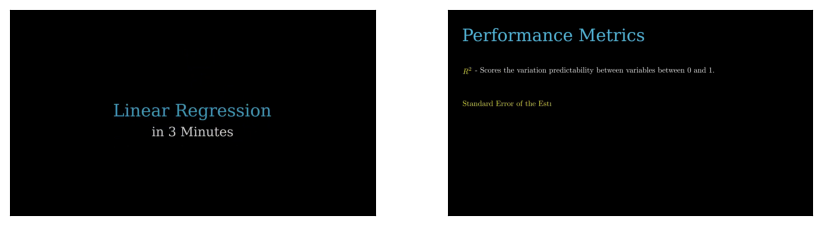

In [134]:
context_str="".join(txt)
plot_images(img)
plt.show()

In [137]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
openai_llm_multi_modal=OpenAIMultiModal(model='gpt-4-vision-preview',max_new_tokens=1500)

In [139]:
result=openai_llm_multi_modal.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str, query_str=query_str, metadata_str=metadata_str
    ),
    image_documents=image_documents
)

In [140]:
print(result.text)

Multiple linear regression is a statistical technique that models the relationship between a dependent variable and two or more independent variables. It extends the concept of simple linear regression, which involves only one independent variable. In multiple linear regression, each independent variable (x1, x2, x3, etc.) has an associated coefficient (beta 1, beta 2, beta 3, etc.) that represents its slope, indicating how much the dependent variable is expected to change with a one-unit change in that independent variable, holding all other variables constant. The model also includes an intercept term (beta 0), which represents the value of the dependent variable when all independent variables are zero. This technique is used to predict the value of the dependent variable based on the values of the independent variables and is visualized in higher dimensions as a hyperplane rather than a line.


In [149]:
query_str="what is OReily?"
retrieval_results=retriever_engine.retrieve(query_str)

img1, txt1= retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** ef15b762-8309-40a5-baec-9a817704b8d6<br>**Similarity:** 0.5190935730934143<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [150]:
image_documents2=SimpleDirectoryReader(input_dir=output_folder,
                                      input_files=img1).load_data()

In [151]:
result2=openai_llm_multi_modal.complete(
    prompt='What is OReilly?',
    image_documents=image_documents2
)
print(result2.text)

O'Reilly is a publishing company known for producing books on computer technology topics. They are particularly well-known for their books on programming, system administration, web development, and other technical subjects. The books are easily recognizable by their distinctive cover design, which typically features a woodcut-style illustration of an animal.

The image you've provided shows a slide promoting two books published by O'Reilly: "Essential Math for Data Science" and "Getting Started with SQL," both authored by Thomas Nield. The slide is encouraging viewers to support the author by buying his books, liking, sharing, and subscribing to content related to the books, and suggesting the next topic for the author to cover. It also mentions that links are provided in the description, which is a common practice in online content to direct viewers to additional resources or to purchase products.


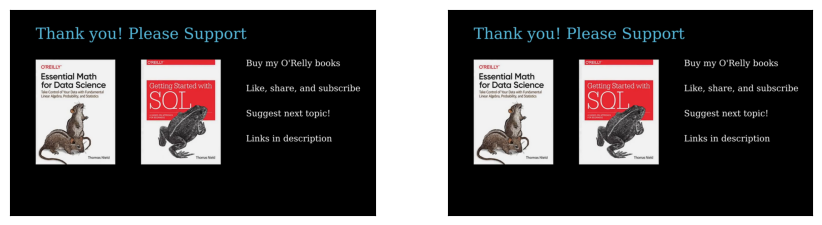

In [152]:
plot_images(img1)